# Problems 3/4

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

import stan
import arviz as az

import nest_asyncio
nest_asyncio.apply()

In [63]:
# Get data from file
df = pd.read_csv('insurance.csv')
df.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)
df

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [65]:
# Spilt data into training and testing sets
data = df.to_numpy()
train_x = data[:int(len(data) * 0.8), :3]
train_y = data[:int(len(data) * 0.8), 3]
test_x = data[int(len(data) * 0.8):, :3]
test_y = data[int(len(data) * 0.8):, 3]
# Normalize the training and testing sets
train_x = (train_x - np.mean(train_x, axis=0)) / np.std(train_x, axis=0)
test_x = (test_x - np.mean(test_x, axis=0)) / np.std(test_x, axis=0)
train_y = (train_y - np.mean(train_y)) / np.std(train_y)
test_y = (test_y - np.mean(test_y)) / np.std(test_y)

In [66]:
# Build data dictionary
data_dict = {
    'N': train_x.shape[0],
    'M': test_x.shape[0],
    'K': train_x.shape[1],
    'x': train_x,
    'x_test': test_x,
    'y': train_y,
}

# Compile Stan model
program_code = open('regression.stan').read()
model = stan.build(program_code, data_dict)

Building...



Building: found in cache, done.

In [67]:
fit = model.sample(num_chains=4, num_warmup=1000, num_samples=2000)

Sampling:   0%
Sampling:   0% (1/12000)
Sampling:   0% (2/12000)
Sampling:   0% (3/12000)
Sampling:   0% (4/12000)
Sampling:   1% (103/12000)
Sampling:   2% (202/12000)
Sampling:   3% (301/12000)
Sampling:   3% (400/12000)
Sampling:   5% (600/12000)
Sampling:   6% (700/12000)
Sampling:   8% (900/12000)
Sampling:   8% (1000/12000)
Sampling:   9% (1100/12000)
Sampling:  11% (1300/12000)
Sampling:  12% (1500/12000)
Sampling:  14% (1700/12000)
Sampling:  16% (1900/12000)
Sampling:  17% (2000/12000)
Sampling:  18% (2100/12000)
Sampling:  19% (2300/12000)
Sampling:  20% (2400/12000)
Sampling:  22% (2600/12000)
Sampling:  23% (2800/12000)
Sampling:  24% (2900/12000)
Sampling:  26% (3100/12000)
Sampling:  28% (3300/12000)
Sampling:  30% (3600/12000)
Sampling:  49% (5900/12000)
Sampling:  67% (8000/12000)
Sampling:  84% (10100/12000)
Sampling: 100% (12000/12000)
Sampling: 100% (12000/12000), done.
Messages received during sampling:
  Gradient evaluation took 0.009351 seconds
  1000 transitions 

In [68]:
# Posterior summary statistics
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-0.000,0.028,-0.052,0.053,0.000,0.000,9868.0,6293.0,1.0
beta[0],0.297,0.029,0.246,0.353,0.000,0.000,10123.0,6478.0,1.0
beta[1],0.158,0.028,0.107,0.213,0.000,0.000,10180.0,6617.0,1.0
beta[2],0.047,0.028,-0.003,0.101,0.000,0.000,9657.0,6207.0,1.0
sigma,0.936,0.020,0.897,0.973,0.000,0.000,9538.0,6176.0,1.0
...,...,...,...,...,...,...,...,...,...
y_pred[263],0.347,0.943,-1.466,2.071,0.010,0.007,8206.0,7856.0,1.0
y_pred[264],-0.443,0.941,-2.252,1.284,0.011,0.008,8018.0,7765.0,1.0
y_pred[265],-0.302,0.941,-2.008,1.538,0.010,0.008,8299.0,7619.0,1.0
y_pred[266],-0.507,0.940,-2.262,1.220,0.011,0.007,7866.0,7475.0,1.0


/home/carror/miniconda3/envs/cognitive/lib/python3.12/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (273), generating only 20 plots
  warnings.warn(


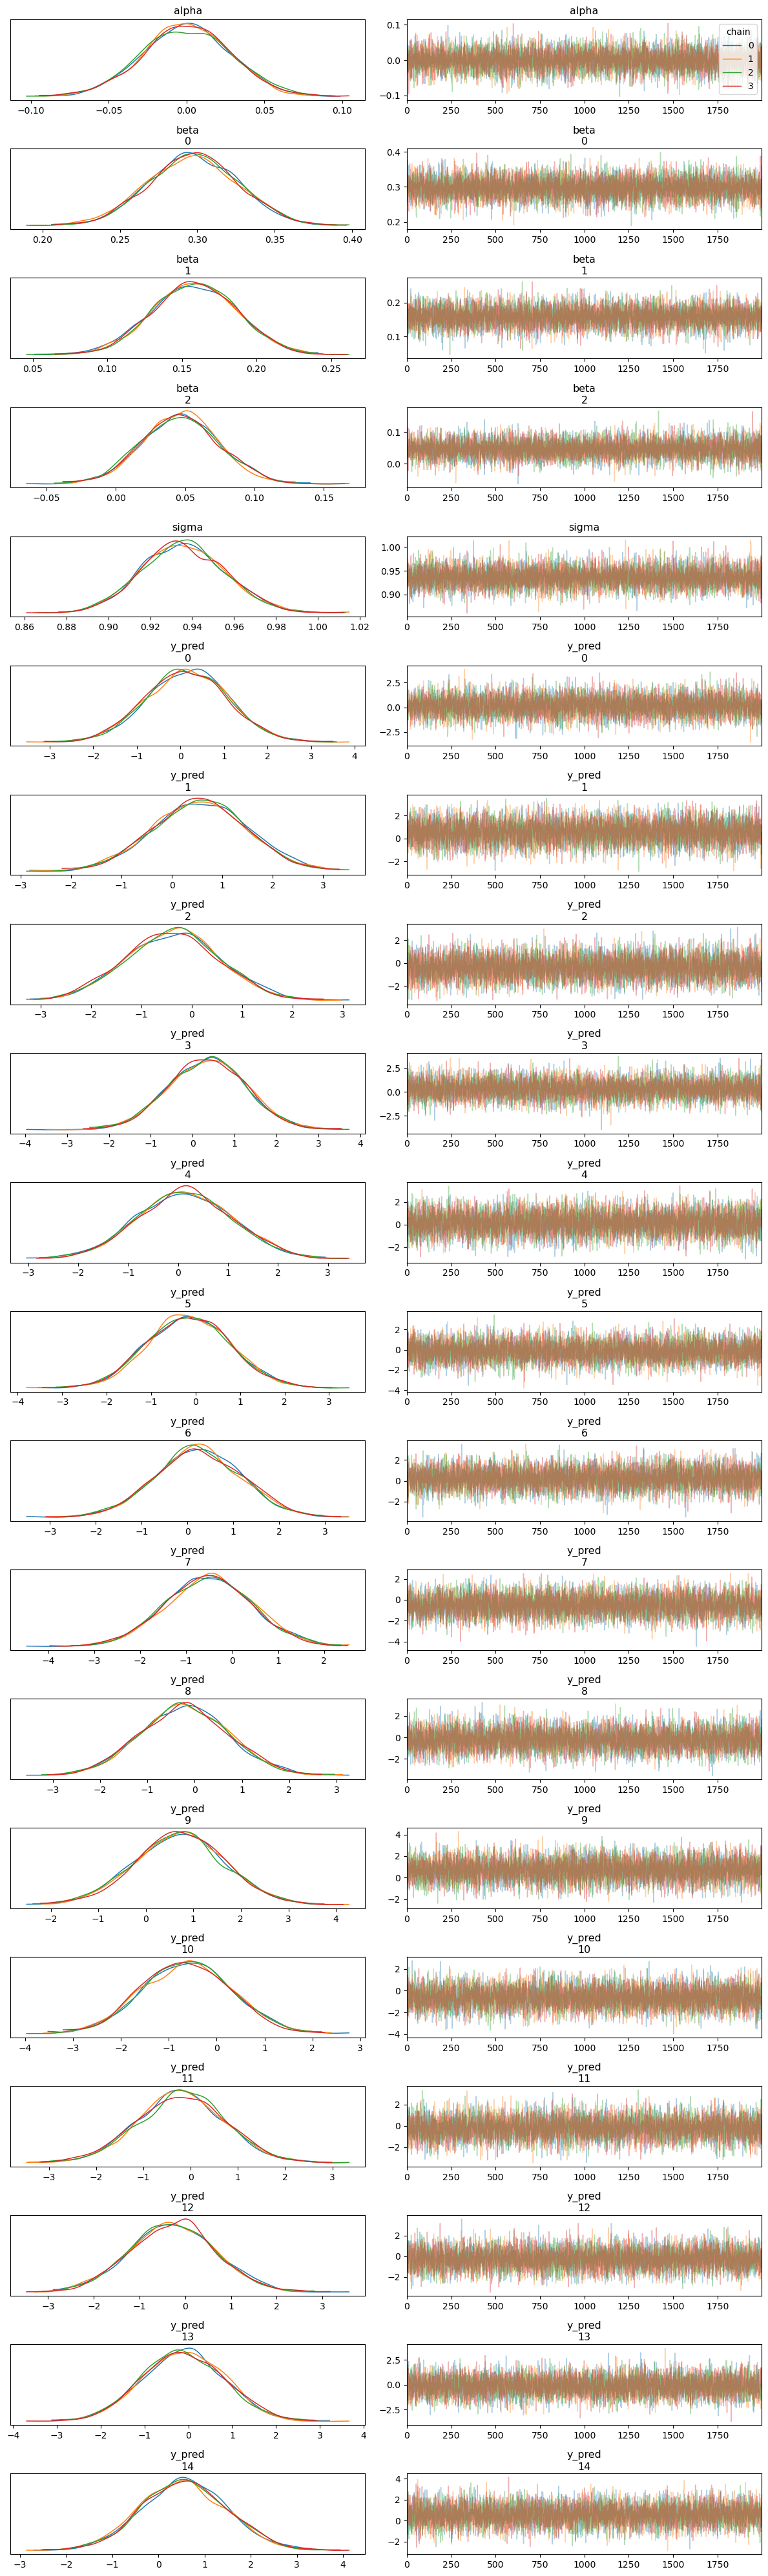

In [69]:
# Traceplots 
f = az.plot_trace(fit, compact=False, legend=True)
plt.tight_layout()

In [72]:
rmse = math.sqrt(
    1 / test_y.shape[0] * np.sum((fit["y_pred"].mean(axis=1) - test_y) ** 2)
)
rmse

0.9543089150249446